#Project 1.

/content/students_reports.csv /content/students_reports.csv
📊 Student Performance Analysis 📊

 Sample Student Summary (First 10 Rows):

            Name  Subject1  Subject2  Subject3  Total   Average Grade
      Troy Olson        57        59        99    215 71.666667     C
     Sandra Hill        97        51        75    223 74.333333     C
 Michael Bradley        40        98        54    192 64.000000     C
    Krystal Levy        55        35        57    147 49.000000     F
    Monica Silva        36        30        65    131 43.666667     F
Richard Campbell        97        81        82    260 86.666667     B
     Ryan Cortez        59        40        84    183 61.000000     C
   William Mcgee        60        74        37    171 57.000000     C
    James Miller        73        60        66    199 66.333333     C
     Anna Horton        72        74        45    191 63.666667     C

📊 Class Average Marks: 64.63
🏆 Topper: Rebecca Chavez | Average: 96.00 | Grade: A


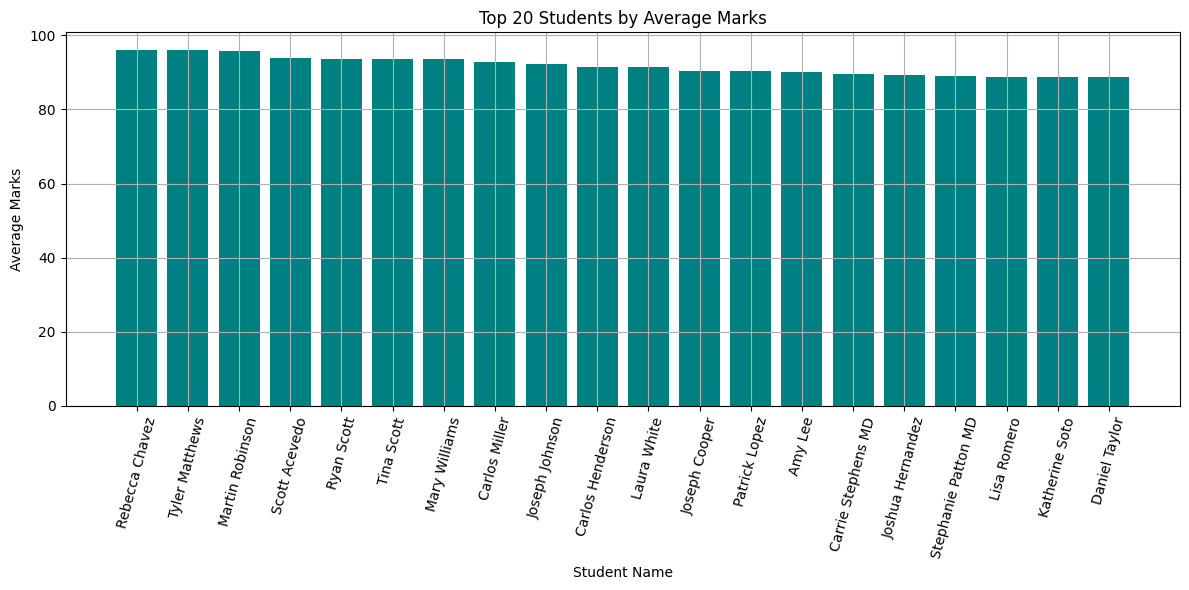


 Results saved to: final_student_report.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load Data from kaggle

def load_student_data(file_path):
    """
    Reads student data from a CSV file.
    Assumes columns: Name, Subject1, Subject2, Subject3
    """
    df = pd.read_csv('/content/students_reports.csv')
    return df
# 2. Clean and Preprocess Data

def clean_data(df):
    """
    Ensures numeric values, fills missing data, prepares DataFrame.
    """
    df.fillna(0, inplace=True)
    for col in ["Subject1", "Subject2", "Subject3"]:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    return df

# 3.calculate Grades

def assign_grade(average):
    if average >= 90:
        return "A"
    elif average >= 75:
        return "B"
    elif average >= 50:
        return "C"
    else:
        return "F"

def process_student_scores(df):
    """
    Adds Total, Average, and Grade columns to the DataFrame.
    """
    df["Total"] = df[["Subject1", "Subject2", "Subject3"]].sum(axis=1)
    df["Average"] = df["Total"] / 3
    df["Grade"] = df["Average"].apply(assign_grade)
    return df

# 4. Display Output Summary

def display_summary(df):
    """
    Shows top 10 students, class average, and topper.
    """
    print("\n Sample Student Summary (First 10 Rows):\n")
    print(df[["Name", "Subject1", "Subject2", "Subject3", "Total", "Average", "Grade"]].head(10).to_string(index=False))

    class_avg = df["Average"].mean()
    topper = df.loc[df["Average"].idxmax()]

    print(f"\n📊 Class Average Marks: {class_avg:.2f}")
    print(f"🏆 Topper: {topper['Name']} | Average: {topper['Average']:.2f} | Grade: {topper['Grade']}")

# 5. Visualization

def plot_top_students(df, top_n=20):
    """
    Displays bar graph for top N students by average marks.
    """
    top_df = df.nlargest(top_n, "Average")
    plt.figure(figsize=(12, 6))
    plt.bar(top_df["Name"], top_df["Average"], color='teal')
    plt.xticks(rotation=75)
    plt.title(f"Top {top_n} Students by Average Marks")
    plt.xlabel("Student Name")
    plt.ylabel("Average Marks")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# 6. Export Final Results (Optional)
def export_results(df, output_path='final_student_report.csv'):
    df.to_csv(output_path, index=False)
    print(f"\n Results saved to: {output_path}")

# 7. Main Function

def main():
    file_path = file_path = input("/content/students_reports.csv ") # Your file name here

    print("📊 Student Performance Analysis 📊")
    df = load_student_data(file_path)
    if df.empty:
        return

    df = clean_data(df)
    df = process_student_scores(df)
    display_summary(df)
    plot_top_students(df, top_n=20)
    export_results(df, output_path="final_student_report.csv")

# 8. Run the Program
if __name__ == "__main__":
    main()